# The Shooting Methods

The **shooting methods** are developed with the goal of transforming the ODE boundary value problems to an equivalent initial value problems, then we can solve it using the methods we learned from the previous chapter. In the initial value problems, we can start at the initial value and march forward to get the solution. But this method is not working for the boundary value problems, because there are not enough initial value conditions to solve the ODE to get a unique solution. Therefore, the shooting methods was developed to overcome this difficulty. 

<img src="images/23.02.01-shooting.png" alt="Shooting" title="The shooting of a target." width="500"/>


The name of the shooting method is derived from analogy with the target shooting: as shown in the above figure, we shoot the target and observe where it hits the target, based on the errors, we can adjust our aim and shoot again in the hope that it will hit close to the target. We can see from the analogy that the shooting method is an iterative method.  

Let's see how the shooting methods works using the second-order ODE given $f(a) = f_a$ and $f(b) = f_b$

$$
F\left(x, f(x), \frac{df(x)}{dx}\right) = \frac{d^{2}f(x)}{dx^{2}}
$$

**Step 1:** We start the whole process by guessing $f'(a)=\alpha$, together with $f(a) = f_a$, we turn the above problem into an initial value problem with two conditions all on value $x=a$. This is the **aim** step.   
**Step 2:** Using what we learned from previous chapter, i.e. we can use Runge-Kutta method, to integrate to the other boundary $b$ to find $f(b) = f_\beta$. This is the **shooting** step.  
**Step 3:** Now we compare the value of $f_\beta$ with $f_b$, usually our initial guess is not good, and $f_\beta \ne f_b$, but what we want is $f_\beta - f_b = 0$, therefore, we adjust our initial guesses and repeat. Until the error is acceptable, we can stop. This is the iterative step. 

We can see that the ideas behind the shooting methods is very simple. But the comparing and finding the best guesses are not easy, this procedure is very tedious. But essentially, finding the best guess to get $f_\beta - f_b = 0$ is a root-finding problem, once we realize this, we have a systematic way to search for the best guess. Since $f_\beta$ is a function of $\alpha$, therefore, the problem becomes finding the root of $g(\alpha) - f_b = 0 $. We can use any methods from chapter 19 to solve it.  


**TRY IT!** We are going out to launch a rocket, and let $y(t)$ is the altitude (meters from the surface) of the rocket at time t. We know the gravity $g = 9.8 m/s^2$. If we want to have the rocket at 50 m off the ground after 5 seconds after launching, what should be the velocity at launching? (we ignore the drag of the air resistance). 

To answer this question, we can frame the problem into a boundary value problem for a second-order ODE. The ODE is: 

$$ \frac{d^2y}{dt^2} = -g$$

with the two boundary conditions are: $y(0) = 0$ and $y(5) = 50$. And we want to answer the question, what's the $y'(0)$ at the launching? 

This is a quite simple question, we can solve it analytically easily, with the correct answer $y'(0) = 34.5$. Now let's solve it using the shooting method. First, we will reduce the order of the function, the second-order ODE becomes:

$$ \frac{dy}{dt} = v$$

$$ \frac{dv}{dt} = -g$$

Therefore, we have $S(t) = \left[\begin{array}{c} y(t) \\v(t) \end{array}\right]$: 

$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & 1 \\
0 & -g/v
\end{array}\right]S(t).
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')
%matplotlib inline

Let's start our first guess, we guess the velocity at launching is 25 m/s. 

In [2]:
solve_ivp?

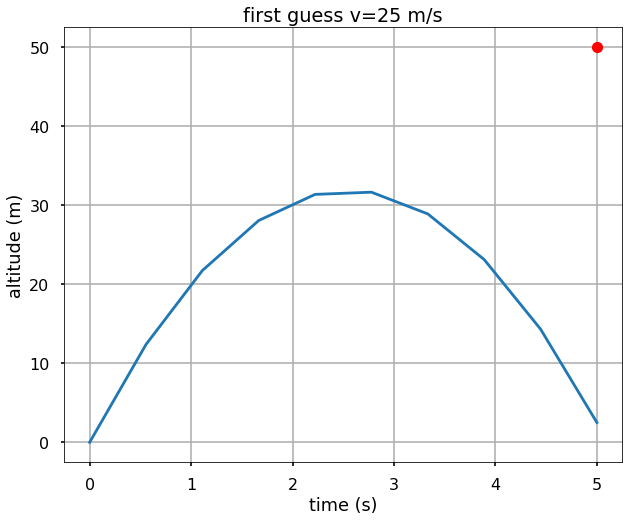

In [14]:
F = lambda t, s: \
  np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)

t_span = np.linspace(0, 5, 100)
y0 = 0
v0 = 25
t_eval = np.linspace(0, 5, 10)
sol = solve_ivp(F, [0, 5], \
                [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.grid(True)
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.show()

From the figure we see that the first guess is a little small, since with this velocity at 5 s, the altitude of the rocket is less than 10 m. The red dot in the figure is the target we want to hit. Now let's adjust our guess and increase the velocity to 40 m/s. 

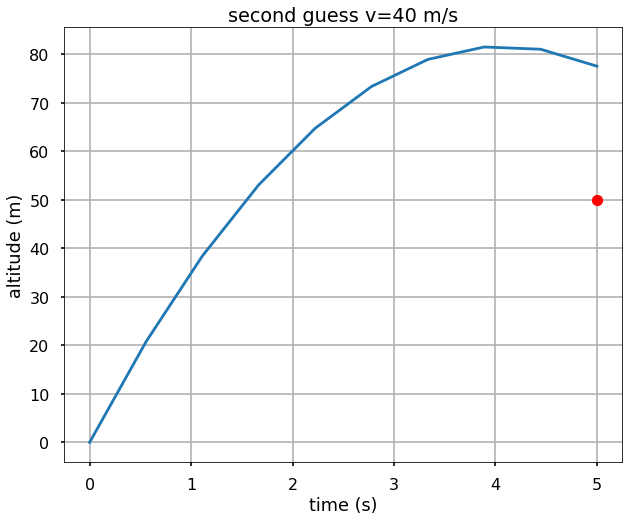

In [27]:
v0 = 40
sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.grid(True)
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'second guess v={v0} m/s')
plt.show()

We can see this time we overestimate the velocity. Therefore, this random guess is not easy to find the best result. As we mentioned above, if we treat this procedure as root-finding, then we will have a good way to search the best result. Let's use Python's *fsolve* to find the root. We can see from the following example, we find the correct answer directly. 

In [29]:
from scipy.optimize import fsolve

def objective(v0):
    sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)
    y = np.asarray(sol.y[0])
    return y[-1] - 50

v0, = fsolve(objective, 10)
v0 = np.asarray(v0,dtype=object)
print(v0)

34.499999999999986


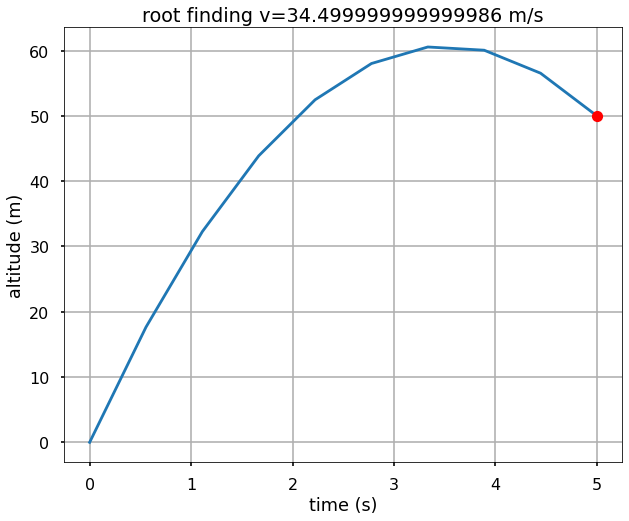

In [25]:
sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.grid(True)
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'root finding v={v0} m/s')
plt.show()

**TRY IT!** Let's change the initial guess and see if that changes our result. 

In [12]:
for v0_guess in range(1, 100, 10):
    v0, = fsolve(objective, v0_guess)
    print('Init: %2d, Result: %3.1f' \
          % (v0_guess, v0))

Init:  1, Result: 34.5
Init: 11, Result: 34.5
Init: 21, Result: 34.5
Init: 31, Result: 34.5
Init: 41, Result: 34.5
Init: 51, Result: 34.5
Init: 61, Result: 34.5
Init: 71, Result: 34.5
Init: 81, Result: 34.5
Init: 91, Result: 34.5
